## balanced_profolio

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
path = '/Users/anubhanagar/Desktop/APlusBernstein-Project/data/pred/lstm_preds.csv'
#path = '/Users/yutingmei/APlusBernstein-Project/data/pred/lstm_preds.csv'
target = pd.read_csv(path)

In [3]:
target = target.iloc[1: , :]
target = target.reset_index(drop=True)

In [4]:
target

,sc,mom,value,.pred_prob_sc_lstm,.pred_prob_mom_lstm,.pred_prob_value_lstm,.pred_sc_lstm,.pred_mom_lstm,.pred_value_lstm,s_&_p_500_ret,sc_1d_fwd_ret,mom_1d_fwd_ret,value_1d_fwd_ret
0,0,0,1,0.507404,0.537511,0.537511,1,1,0,-0.000333,-0.008109,-0.002763,-0.001990
1,1,1,1,0.513883,0.548627,0.548627,1,1,0,-0.002512,0.008351,0.009081,0.006174
2,1,1,1,0.525089,0.551225,0.551225,1,1,0,0.006082,0.001307,0.007427,0.001928
3,0,1,1,0.535904,0.556041,0.556041,1,1,0,-0.000212,0.000261,0.001359,0.002828
4,1,1,0,0.517375,0.554009,0.554009,1,1,0,0.000348,0.005483,0.003284,0.000307
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,1,0,0,0.473095,0.508067,0.508067,0,1,0,-0.000215,0.001707,-0.004040,-0.002439
1841,0,0,0,0.475162,0.510649,0.510649,0,1,0,-0.000846,-0.003714,-0.004661,0.006674
1842,0,0,0,0.484604,0.517438,0.517438,0,1,0,0.006763,-0.013597,-0.007605,-0.009775
1843,1,0,1,0.492156,0.528105,0.528105,0,1,0,-0.007195,0.004891,-0.007206,0.008705


In [6]:
#chceck this code I think there is something wrong with s&p data
def balanced_profolio(target):
    #target_ = target.iloc[:, 1:4]
    # target = target.iloc[:, -3:]#the return values
    start = 100000
    #s_p = target.iloc[:, 4]
    s_p = target.iloc[:, 9]#s&p
    #s_p = target["s_&_p_500_ret"]
    real = target.iloc[:, 0:3]#real values in 1 or 0
    compare_result = []
    pred = target.iloc[:,7:10]
    op = target.iloc[:,-3:]
    for i in range(target.shape[0]):
        row = op.iloc[i, :]
        add = sum(list(map(lambda x: (start / 3) * (x), row)))
        if pred.iloc[i,:].sum() >= 2:
            # pred direction
            op_invest = 1
            op_s_p = -1
        else:
            op_invest = -1
            op_s_p = 1
        if real.iloc[i, :].sum() >= 2:
            # real direction
            op_real = 1
        else:
            op_real = -1
        if op_real != op_invest:
            op_final = -1
        else:
            op_final = 1
        initial = start
        start = (op_invest * add + op_s_p * s_p[i] * initial) * op_final
        compare_result.append(start)
    return compare_result

In [7]:
balanced_profolio(target)

[395.40479746328003,
 4.104575460947678,
 -0.010375145027130106,
 -1.7586555563293423e-05,
 -4.7070235956965286e-08,
 -7.69475707995297e-10,
 -1.9382214440959264e-11,
 -1.3140045364123303e-13,
 8.258500679646146e-16,
 -2.0018098039152377e-18,
 -1.7581556529176042e-20,
 -2.3112331205174773e-23,
 -2.3574334376940203e-25,
 -3.9360577327752804e-27,
 4.3740199412843846e-29,
 6.622685636818763e-31,
 1.235644406548933e-32,
 3.1837500677648567e-34,
 5.7579774852908984e-36,
 1.165419562221196e-37,
 -3.514096498711389e-39,
 3.897447259910985e-41,
 -5.042002712793172e-43,
 1.0928178072275205e-45,
 -1.3525812762927496e-47,
 -1.3253945633829668e-49,
 1.2543992401649646e-51,
 1.1848049076863159e-53,
 2.498782554467989e-56,
 3.05609125051496e-59,
 2.8410506000263414e-61,
 4.5608280645970923e-63,
 -2.7633210595363834e-65,
 -2.7513759388083066e-67,
 1.9001764183292548e-69,
 7.133059854877729e-72,
 3.3323775725792827e-74,
 1.8410657778171785e-76,
 -1.6784564465394647e-78,
 -4.554569561576574e-80,
 6.251

In [9]:
import pandas as pd 
import statistics
import numpy as np

In [20]:
ret = balanced_profolio(target)
Net_return = pd.DataFrame(ret, columns = ['Returns'])
#df.append(ret)

In [31]:
#pip install pyfolio

In [32]:
#pip install quantrocket-client

<AxesSubplot:ylabel='Returns'>

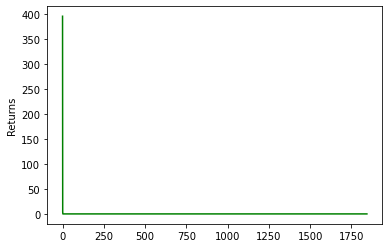

In [30]:
import pyfolio as pf
import matplotlib.pyplot as plt
import empyrical
from quantrocket.zipline import ZiplineBacktestResult
#plot net returns 
pf.plotting.plot_returns(Net_return['Returns'])

In [21]:
Net_return

,Returns
0,3.954048e+02
1,4.104575e+00
2,-1.037515e-02
3,-1.758656e-05
4,-4.707024e-08
...,...
1840,0.000000e+00
1841,-0.000000e+00
1842,-0.000000e+00
1843,-0.000000e+00


In [22]:
#performance metrics 
# Average of returns or mean daily average 
Average_daily_ret = statistics.mean(Net_return["Returns"])
print(Average_daily_ret)

0.21653061254459935


In [23]:
#Holding period returns
HPR = (Net_return['Returns'].iat[-1] - Net_return['Returns'].iat[0])/Net_return['Returns'].iat[0]
HPR

-1.0

In [24]:
#volatility of returns 
vol = statistics.stdev(Net_return["Returns"])
vol

9.205867274177333

In [25]:
#Sharpe Ratio 
#risk_free_rate = 0.05
def sharpe_ratio(HPR, risk_free_rate, vol):
    
    return (HPR - risk_free_rate) / vol*(np.sqrt(252))
sharpe_ratio(HPR = HPR,risk_free_rate= 0.05, vol = vol )

-1.8106097734497755

In [58]:
#understanding s&p trend 
#this is invest in s&p and let it go for the entire time period 
#let the s&p run for the entire trend our model should do better than that 
#here its previous start*s&p and then that value is multiplied to next s&p and so on
s_p = target.iloc[:, 9]
#s_p = s_p.iloc[1: , :]

In [41]:
s_p = target.iloc[:, 9]
start = 100000
value = 0
s_p_ret = []
for i in s_p:
    start = i*start
    s_p_ret.append(start)
    

In [42]:
s_p_ret

[-33.29730673916,
 0.08363553569192875,
 0.0005086523216044466,
 -1.0793653852575197e-07,
 -3.7594427537825796e-11,
 -8.671877003278919e-14,
 1.090591955828476e-15,
 1.1797960472023204e-17,
 6.0950483165959e-20,
 -8.21079556602132e-23,
 3.1982198354015296e-25,
 8.870898548184704e-28,
 5.099876592403525e-31,
 -4.533567648245196e-33,
 9.464044995981277e-35,
 -4.6149569519416866e-37,
 -2.8339000120255362e-39,
 2.8931866231557485e-41,
 3.2597678163050273e-43,
 -2.1075419364246968e-45,
 4.811928531658132e-47,
 3.676854953893163e-49,
 -7.457613739664341e-52,
 -9.277100510794754e-54,
 -1.2340312335397806e-55,
 -1.936521618335982e-58,
 -2.1421984965924304e-60,
 5.768249832834344e-64,
 3.351384669209345e-66,
 1.6117445385113475e-68,
 1.867159715129764e-71,
 -1.218224438748584e-73,
 -7.347650340066455e-76,
 1.409799307549502e-78,
 8.721753646704859e-81,
 -1.1754194110387841e-83,
 -2.5481690319230884e-88,
 -1.2608545200121875e-90,
 -3.508625578125712e-93,
 2.5888484730368855e-95,
 3.9525689006614

In [43]:
Net = pd.DataFrame(s_p_ret, columns = ['Returns'])

In [44]:
Net

,Returns
0,-3.329731e+01
1,8.363554e-02
2,5.086523e-04
3,-1.079365e-07
4,-3.759443e-11
...,...
1840,0.000000e+00
1841,-0.000000e+00
1842,-0.000000e+00
1843,0.000000e+00


In [45]:
#performance metrics 
# Average of returns or mean daily average 
Average_daily_ret = statistics.mean(Net["Returns"])
print(Average_daily_ret)

-0.018001714178385194


In [46]:
#Holding period returns
HPR = (Net['Returns'].iat[-1] - Net['Returns'].iat[0])/Net['Returns'].iat[0]
HPR

-1.0

In [47]:
#volatility of returns 
vol = statistics.stdev(Net["Returns"])
vol

0.7751984342497008

In [48]:
#Sharpe Ratio 
#risk_free_rate = 0.05
def sharpe_ratio(HPR, risk_free_rate, vol):
    
    return (HPR - risk_free_rate) / vol*(np.sqrt(252))
sharpe_ratio(HPR = HPR,risk_free_rate= 0.05, vol = vol )

-21.501892319790063